In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras
import tensorflow as tf

In [267]:
data = pd.read_csv("google.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [268]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4312,2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039
4313,2021-10-06,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078
4314,2021-10-07,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961
4315,2021-10-08,2806.340088,2788.586914,2798.120117,2801.120117,946200.0,2801.120117
4316,2021-10-11,2815.272949,2776.129883,2796.000000,2776.949951,828700.0,2776.949951


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [176]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


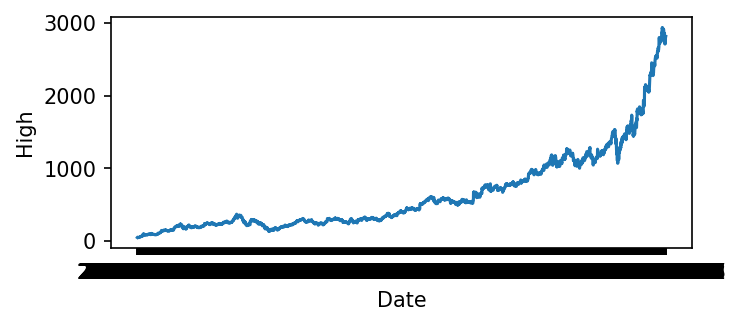

In [177]:
plt.figure(figsize=(5,2),dpi=150)

plt.plot(data.Date,data.High)
plt.xlabel("Date")
plt.ylabel("High")
plt.show()

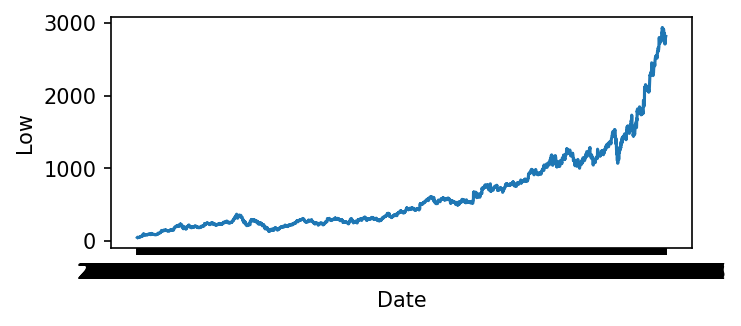

In [178]:
plt.figure(figsize=(5,2),dpi=150)

plt.plot(data.Date,data.High)
plt.xlabel("Date")
plt.ylabel("Low")
plt.show()

In [269]:
data.Date=pd.to_datetime(data.Date)

In [270]:
data.set_index(data.Date, drop=True,inplace=True)
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2004-08-19,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [271]:
X=data.drop(data[["Open","Adj Close","Date"]],axis=1)

In [272]:
X

,High,Low,Close,Volume
Date,,,,
2004-08-19,51.835709,47.800831,49.982655,44871361.0
2004-08-20,54.336334,50.062355,53.952770,22942874.0
2004-08-23,56.528118,54.321388,54.495735,18342897.0
2004-08-24,55.591629,51.591621,52.239197,15319808.0
2004-08-25,53.798351,51.746044,52.802086,9232276.0
...,...,...,...,...
2021-10-05,2747.239990,2680.000000,2723.540039,1206300.0
2021-10-06,2757.040039,2689.729980,2747.080078,988200.0
2021-10-07,2803.089111,2771.260010,2783.709961,912500.0


In [273]:
y = data.Open
y

Date
2004-08-19      49.813290
2004-08-20      50.316402
2004-08-23      55.168217
2004-08-24      55.412300
2004-08-25      52.284027
                 ...     
2021-10-05    2680.000000
2021-10-06    2692.510010
2021-10-07    2777.260010
2021-10-08    2798.120117
2021-10-11    2796.000000
Name: Open, Length: 4317, dtype: float64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)

X_train = (X_train-mu)/sigma
X_test = (X_test-mu)/sigma
X_train.shape

(3453, 4)

In [275]:
model = keras.Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25,activation = "relu"))
model.add(Dense(1,activation = "linear"))


model.compile(optimizer = "adam", loss = "mse", metrics=["mape"])

model.fit(X_train, y_train, epochs = 1000, verbose=0, validation_split=0.1)


In [276]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

108/108 [==============================] - 0s 4ms/step - loss: 53.9242 - mape: 0.6931
[53.92418670654297, 0.6931467652320862]
27/27 [==============================] - 0s 5ms/step - loss: 52.3060 - mape: 0.7202
[52.30597686767578, 0.7201977372169495]


In [284]:
y=test=pd.DataFrame(y_test)

In [279]:
y_test=y_test.reset_index()
y_test

,Date,Open
0,2019-09-24,1240.000000
1,2012-08-16,332.508667
2,2012-04-09,313.066559
3,2014-09-11,578.770996
4,2019-07-10,1131.219971
...,...,...
859,2010-02-09,268.762604
860,2019-11-04,1276.449951
861,2014-03-12,595.966187
862,2012-11-19,326.625732


In [299]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,1234.085571
1,337.608032
2,317.923187
3,577.744507
4,1132.915039
...,...
859,271.598633
860,1285.310913
861,597.280518
862,334.198425


In [301]:
comp=y_test.merge(y_pred,left_index=True, right_index=True)

In [305]:
comp

,Date,Open,0
0,2019-09-24,1240.000000,1234.085571
1,2012-08-16,332.508667,337.608032
2,2012-04-09,313.066559,317.923187
3,2014-09-11,578.770996,577.744507
4,2019-07-10,1131.219971,1132.915039
...,...,...,...
859,2010-02-09,268.762604,271.598633
860,2019-11-04,1276.449951,1285.310913
861,2014-03-12,595.966187,597.280518
862,2012-11-19,326.625732,334.198425


In [308]:
comp.columns=["Date","Actual","Prediction"]

In [309]:
comp

,Date,Actual,Prediction
0,2019-09-24,1240.000000,1234.085571
1,2012-08-16,332.508667,337.608032
2,2012-04-09,313.066559,317.923187
3,2014-09-11,578.770996,577.744507
4,2019-07-10,1131.219971,1132.915039
...,...,...,...
859,2010-02-09,268.762604,271.598633
860,2019-11-04,1276.449951,1285.310913
861,2014-03-12,595.966187,597.280518
862,2012-11-19,326.625732,334.198425
